In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import scipy.optimize as spo

# Optimizers
- algortithm that can:
<br/>
  i. find minimum values of functions
  ii. build parameterized models based on data
  iii. refine allocations to stocks in portfolio

In [1]:
def f(x):
    y = (x - 1.5)**2 + 0.5
    print(f"x = {x}, y = {y}")
    return y

x = [2.], y = [0.75]
x = [2.], y = [0.75]
x = [2.00000001], y = [0.75000001]
x = [0.99999999], y = [0.75000001]
x = [1.5], y = [0.5]
x = [1.5], y = [0.5]
x = [1.50000001], y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minimum found at X = [1.5], Y = 0.5
x = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


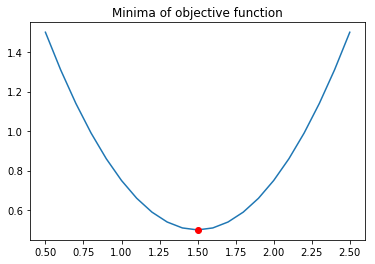

In [14]:
xguess = 2.0
min_result = spo.minimize(f, xguess, method='SLSQP', options={'disp': True})
print(f"Minimum found at X = {min_result.x}, Y = {min_result.fun}")

xplot = np.linspace(0.5, 2.5, 21)
yplot = f(xplot)
plt.plot(xplot, yplot)
plt.plot(min_result.x, min_result.fun, 'ro')
plt.title("Minima of objective function")
plt.show()

# Convex Problems
- choose two points & draw line
- convex problem if line is above graph

- Convex problem has one global minima

# Building a parameterized model

- simple paramterized model: f(x) = mx + b; m & b are the parameters to this function
- instead of m we will use c0 and for b we will use c1

### f(x) = c<sub>1</sub>x+c<sub>1</sub>


## Fit a line to given data points

In [46]:
# our goal is to minimize error which is given by error function

def error(line, data):
    """Computer error between given line model and observed data
    
    Parameters
    ----------
    line: tuple/list/array ((C0, C1) where C0 iis slope and C1 is Y-intercept
    data: 2D array where each row is a point (x, y)
    
    Returns error as a single real value.
    """
    slope, intercept = line
    fitted_y = slope * data[:, 0] + intercept
    actual_y = data[:, 1]
    err = np.sum((actual_y - fitted_y)**2)
    return err

In [53]:
def fit_line(data, error_func):
    """Fit a line to given data, using a supplied error function.

    Parameters
    ----------
    data: 2D array where each row is a point (X0, Y)
    error_func: function that computes the error between a line and observed data

    Returns line that minimizes the error function.
    """

    # generate inital guess for the line model: slope = 0 & y-intercept = mean of y
    l = np.float32([0, np.mean(data[:, 1])])

    # plot initial guess (optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, l[0] * x_ends + l[1], 'm--', linewidth=3.0, label='Initial Guess')
    
    # call optimizer to minimize error function
    ## the args in here is how we pass data to our error function
    result = spo.minimize(error_func, l, args=(data,), method='SLSQP', options={'disp': True})
    return result.x

Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 126.78066439840089
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: C0 = 3.7402607870920495, C1 = 3.1268385705849604


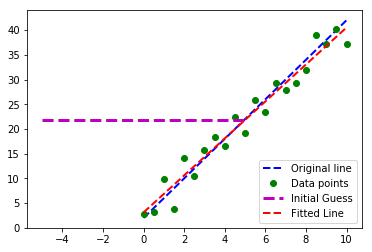

In [55]:
# Define original line
l_orig = np.float32([4,2])
print(f"Original line: C0 = {l_orig[0]}, C1 = {l_orig[1]}")
Xorig = np.linspace(0, 10, 21) # gives linearly spaced 21 points between 0 & 10
Yorig = l_orig[0] * Xorig + l_orig[1]
plt.plot(Xorig, Yorig, 'b--', linewidth = 2.0, label = "Original line")

# generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:, 0 ], data[:, 1], 'go', label='Data points')

# fit line
l_fit = fit_line(data, error)
print ("Fitted line: C0 = {}, C1 = {}".format(l_fit[0], l_fit[1]) )
plt.plot(data[:, 0], l_fit[0] * data[:, 0] + l_fit[1], 'r--', linewidth=2.0, label = "Fitted Line")
plt.legend(loc=4)

# Let's fit polynomial then just some line

In [59]:
def err_poly(c, data):
    """Computer error between given polynomial and observed data

    Parameters
    ----------
    c: numpy.poly1d object or equivalent array representing polynomial coefficients
    data: 2D array where each row is a point (x,y)

    Returns error as a single real value
    """
    # Metric: Sum of squared Y-axis differences
    actual_y = data[:, 1]
    actual_x = data[:, 0]
    guess_y = np.polyval(c, actual_x)
    err = np.sum( (actual_y - guess_y) ** 2 )
    return err

def fit_poly(data, error_func, degree=3):
    """Fit a polynomial to given data, using supplied error function
    
    Parameters
    ----------

    data: 2D array where each row is a point (x, y)
    error_func: function that computes the error between a polynomial and observed data
    
    Returns polynomial that minimized the error function
    """

    inital_polynomial_coefficient_guess = np.poly1d(np.ones(degree + 1,  dtype=np.float32))

    # plot initial guess
    x = np.linspace(-5,-5, 21)
    plt.plot(x, np.polyval((inital_polynomial_coefficient_guess, x), 'm--', linewidth=2.0, label="Inital guess"))

    result = spo.minimize(error_func, inital_polynomial_coefficient_guess, args=(data,), method='SLSQP', options={'disp': True})
    return np.poly1d(result.x) # convert optimal result into a poly1d object and return it